Problem statement.

Build a recommender system by using cosine simillarties score.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("book (1).csv",encoding='latin1')

In [3]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df.isna().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [8]:
df.rename(columns={'User.ID':'ID','Book.Title':'book_title','Book.Rating':'book_rating'},inplace=True)

In [9]:
df.head()

,ID,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [10]:
df['ID'].nunique()

2182

In [11]:
df['book_title'].nunique()

9659

In [12]:
df['book_rating'].nunique()

10

In [13]:
df['book_rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: book_rating, dtype: int64

In [14]:
df['book_title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: book_title, Length: 9659, dtype: int64

In [15]:
df['ID'].value_counts()

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: ID, Length: 2182, dtype: int64

In [16]:
df.duplicated().sum()

2

In [17]:
df[df.duplicated()].shape

(2, 3)

In [18]:
df[df.duplicated()]

,ID,book_title,book_rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(9998, 3)

# Visualization

In [21]:
#sns.countplot(y=df['book_title'])

<AxesSubplot:xlabel='book_rating', ylabel='count'>

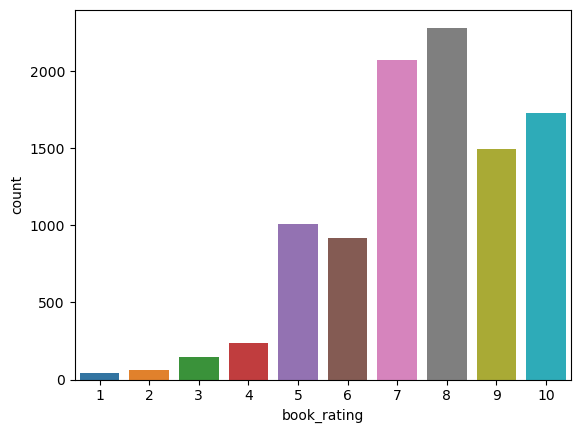

In [22]:
sns.countplot(df['book_rating'])

<AxesSubplot:ylabel='book_rating'>

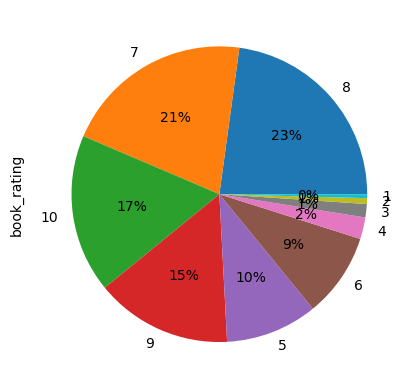

In [23]:
df['book_rating'].value_counts().plot(kind='pie',autopct="%0.0f%%")

# model Building

In [24]:
df['ID'].duplicated()

0       False
1       False
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999    False
Name: ID, Length: 9998, dtype: bool

In [25]:
df[df['ID'].duplicated()]

,ID,book_title,book_rating
2,276729,Decision in Normandy,6
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8
10,276747,Nights Below Station Street,7
11,276747,Hitler's Secret Bankers: The Myth of Swiss Neu...,7
...,...,...,...
9994,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7


In [26]:
 df = df['ID'].drop_duplicates()

In [27]:
# model Building
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [29]:
# pivot the dataframe to create a user-item matrix
pivot = pd.pivot(data=df,index='ID',columns='book_title',values='book_rating')

KeyError: 'ID'